<a href="https://colab.research.google.com/github/prantoran/ai-prac/blob/master/ML-ZoomCamp-2024/week1-duration_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-ZoomCamp 2024: Homework week 1
link: https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/01-intro/homework.md

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

In [1]:
!python -V

Python 3.10.12


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [6]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

--2024-05-21 13:49:56--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.157, 99.84.245.193, 99.84.245.141, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  65.2MB/s    in 0.7s    

2024-05-21 13:49:57 (65.2 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]



In [7]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2024-05-21 13:50:26--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.157, 99.84.245.141, 99.84.245.9, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47748012 (46M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-02.parquet’

yellow_tripdata_202 100%[===================>]  45.54M   126MB/s    in 0.4s    

2024-05-21 13:50:26 (126 MB/s) - ‘yellow_tripdata_2023-02.parquet’ saved [47748012/47748012]



In [9]:
!ls -la

total 93208
drwxr-xr-x 1 root root     4096 May 21 13:50 .
drwxr-xr-x 1 root root     4096 May 21 13:45 ..
drwxr-xr-x 4 root root     4096 May 17 13:36 .config
drwxr-xr-x 1 root root     4096 May 17 13:37 sample_data
-rw-r--r-- 1 root root 47673370 Mar 20  2023 yellow_tripdata_2023-01.parquet
-rw-r--r-- 1 root root 47748012 May  1  2023 yellow_tripdata_2023-02.parquet


In [13]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

* 32.59
* 42.59
* 52.59
* 62.59

In [16]:
df.head().T

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


In [18]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [19]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [20]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will
  label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [22]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [23]:
df[categorical] = df[categorical].astype(str)

In [24]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [26]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [28]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [30]:
dv.get_feature_names_out()

array(['DOLocationID=1', 'DOLocationID=10', 'DOLocationID=100',
       'DOLocationID=101', 'DOLocationID=102', 'DOLocationID=106',
       'DOLocationID=107', 'DOLocationID=108', 'DOLocationID=109',
       'DOLocationID=11', 'DOLocationID=111', 'DOLocationID=112',
       'DOLocationID=113', 'DOLocationID=114', 'DOLocationID=115',
       'DOLocationID=116', 'DOLocationID=117', 'DOLocationID=118',
       'DOLocationID=119', 'DOLocationID=12', 'DOLocationID=120',
       'DOLocationID=121', 'DOLocationID=122', 'DOLocationID=123',
       'DOLocationID=124', 'DOLocationID=125', 'DOLocationID=126',
       'DOLocationID=127', 'DOLocationID=128', 'DOLocationID=129',
       'DOLocationID=13', 'DOLocationID=130', 'DOLocationID=131',
       'DOLocationID=132', 'DOLocationID=133', 'DOLocationID=134',
       'DOLocationID=135', 'DOLocationID=136', 'DOLocationID=137',
       'DOLocationID=138', 'DOLocationID=139', 'DOLocationID=14',
       'DOLocationID=140', 'DOLocationID=141', 'DOLocationID=142',
  

In [31]:
len(dv.get_feature_names_out())

516

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 3.64
* 7.64
* 11.64
* 16.64

In [32]:
target = 'duration'
y_train = df[target].values

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_train)

In [35]:
mean_squared_error(y_train, y_pred, squared=False)

7.656752063242953

<ipython-input-36-5fdabbf3bec2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
<ipython-input-36-5fdabbf3bec2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


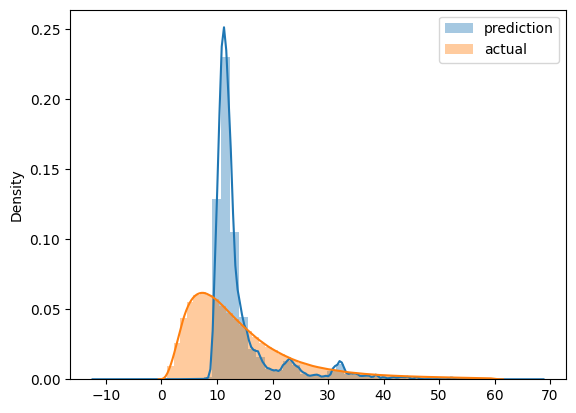

In [36]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

* 3.81
* 7.81
* 11.81
* 16.81

In [37]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df


In [39]:
df_val = read_dataframe('yellow_tripdata_2023-02.parquet')

In [42]:
len(df_val)

2855951

In [43]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [44]:
y_val = df_val[target].values

In [45]:
y_pred = lr.predict(X_val)

In [46]:
mean_squared_error(y_val, y_pred, squared=False)

7.818628965425388

In [48]:
with open('lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

## Submit the results

* Submit your results here: https://courses.datatalks.club/mlops-zoomcamp-2024/homework/hw1
* If your answer doesn't match options exactly, select the closest one